In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("loan_tap2.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## 1. Define problem statement and perform Exploratory Data Analysis

### a. Observations on shape of data and data types of all attributes

In [3]:
data.shape

(1017, 27)

In [4]:
data['emp_title']


0                     Marketing
1               Credit analyst 
2                  Statistician
3               Client Advocate
4       Destiny Management Inc.
                 ...           
1012             Office Manager
1013         Events coordinator
1014                Service man
1015                        NaN
1016                      Agent
Name: emp_title, Length: 1017, dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             1017 non-null   int64  
 1   term                  1017 non-null   object 
 2   int_rate              1017 non-null   float64
 3   installment           1017 non-null   float64
 4   grade                 1017 non-null   object 
 5   sub_grade             1017 non-null   object 
 6   emp_title             960 non-null    object 
 7   emp_length            971 non-null    object 
 8   home_ownership        1017 non-null   object 
 9   annual_inc            1017 non-null   float64
 10  verification_status   1017 non-null   object 
 11  issue_d               1017 non-null   object 
 12  loan_status           1017 non-null   object 
 13  purpose               1017 non-null   object 
 14  title                 1013 non-null   object 
 15  dti                  

### b. Check for missing value (if any)

In [6]:
data.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_title               57
emp_length              46
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
title                    4
dti                      0
earliest_cr_line         0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               0
total_acc                0
initial_list_status      0
application_type         0
mort_acc                78
pub_rec_bankruptcies     1
address                  0
dtype: int64

### c. Display the statistical summary

In [7]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,939.000000,1016.000000
mean,14506.120944,13.626981,445.157601,74334.337217,17.057345,11.190757,0.157325,15537.740413,53.111013,24.732547,1.739084,0.119094
std,8227.538845,4.481765,247.675409,48992.210241,8.080939,4.927725,0.417185,16321.744475,23.501289,11.380380,2.109243,0.336000
min,1000.000000,5.320000,31.060000,12000.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,8325.000000,10.640000,267.470000,45000.000000,11.150000,8.000000,0.000000,5962.000000,35.900000,17.000000,0.000000,0.000000
50%,12500.000000,13.110000,401.000000,65000.000000,16.590000,10.000000,0.000000,11145.000000,54.500000,23.000000,1.000000,0.000000
75%,20000.000000,16.290000,578.690000,88000.000000,23.060000,14.000000,0.000000,19993.000000,70.700000,31.000000,3.000000,0.000000
max,35000.000000,28.990000,1275.460000,710000.000000,43.690000,42.000000,4.000000,216194.000000,106.500000,71.000000,12.000000,3.000000


### d. Univariate Analysis and Bivariate Analysis of all the attributes

#### Univeriate

In [21]:
numerical_data= data.select_dtypes(include=['int64','float64']).columns
data[numerical_data]

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000,11.44,329.48,117000.0,26.24,16,0,36369,41.8,25,0.0,0.0
1,8000,11.99,265.68,65000.0,22.05,17,0,20131,53.3,27,3.0,0.0
2,15600,10.49,506.97,43057.0,12.79,13,0,11987,92.2,26,0.0,0.0
3,7200,6.49,220.65,54000.0,2.60,6,0,5472,21.5,13,0.0,0.0
4,24375,17.27,609.33,55000.0,33.95,13,0,24584,69.8,43,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1012,4500,10.99,147.31,53000.0,29.44,15,1,7685,39.2,33,8.0,1.0
1013,12000,14.65,413.94,50000.0,8.09,8,0,12213,76.8,13,0.0,0.0
1014,15000,11.22,492.65,70000.0,22.06,25,0,17709,38.2,34,0.0,0.0
1015,9000,18.99,329.86,25000.0,33.61,11,0,4147,43.7,19,0.0,0.0


<Axes: >

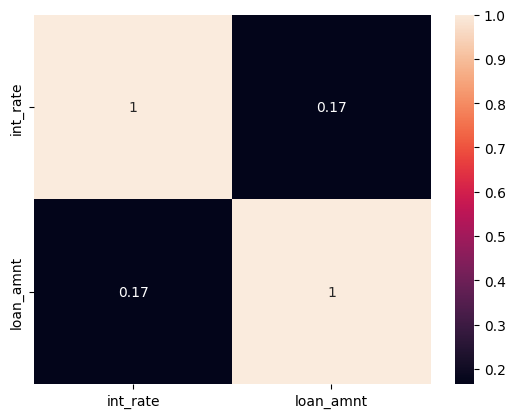

In [31]:
sns.heatmap(data=data[['int_rate','loan_amnt']].corr(), annot=True)

In [22]:
categorical_data=data.select_dtypes(include='object').columns
data[categorical_data]

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-15,Fully Paid,vacation,Vacation,Jun-90,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,Jul-04,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,Aug-07,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,Sep-06,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,Mar-99,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,36 months,B,B3,Office Manager,10+ years,MORTGAGE,Not Verified,Jul-14,Fully Paid,credit_card,Credit card refinancing,Aug-98,f,INDIVIDUAL,"141 Cory Coves Apt. 097\r\nLake Barry, DE 00813"
1013,36 months,C,C5,Events coordinator,9 years,RENT,Not Verified,Jun-15,Fully Paid,debt_consolidation,Debt consolidation,Jan-05,w,INDIVIDUAL,"2979 Howard Curve\r\nTeresaside, NY 70466"
1014,36 months,B,B5,Service man,10+ years,OWN,Verified,Dec-15,Fully Paid,debt_consolidation,Debt consolidation,Dec-94,w,INDIVIDUAL,"685 Davis Freeway Apt. 156\r\nWest Diana, WA 2..."
1015,36 months,E,E1,NaN,NaN,OWN,Verified,May-14,Charged Off,debt_consolidation,Debt consolidation,Jul-96,f,INDIVIDUAL,"04305 Edwards Turnpike\r\nProctorberg, OK 48052"


          loan_amnt     int_rate  installment     annual_inc          dti  \
count   1017.000000  1017.000000  1017.000000    1017.000000  1017.000000   
mean   14506.120944    13.626981   445.157601   74334.337217    17.057345   
std     8227.538845     4.481765   247.675409   48992.210241     8.080939   
min     1000.000000     5.320000    31.060000   12000.000000     0.000000   
25%     8325.000000    10.640000   267.470000   45000.000000    11.150000   
50%    12500.000000    13.110000   401.000000   65000.000000    16.590000   
75%    20000.000000    16.290000   578.690000   88000.000000    23.060000   
max    35000.000000    28.990000  1275.460000  710000.000000    43.690000   

          open_acc      pub_rec      revol_bal   revol_util    total_acc  \
count  1017.000000  1017.000000    1017.000000  1017.000000  1017.000000   
mean     11.190757     0.157325   15537.740413    53.111013    24.732547   
std       4.927725     0.417185   16321.744475    23.501289    11.380380   
mi

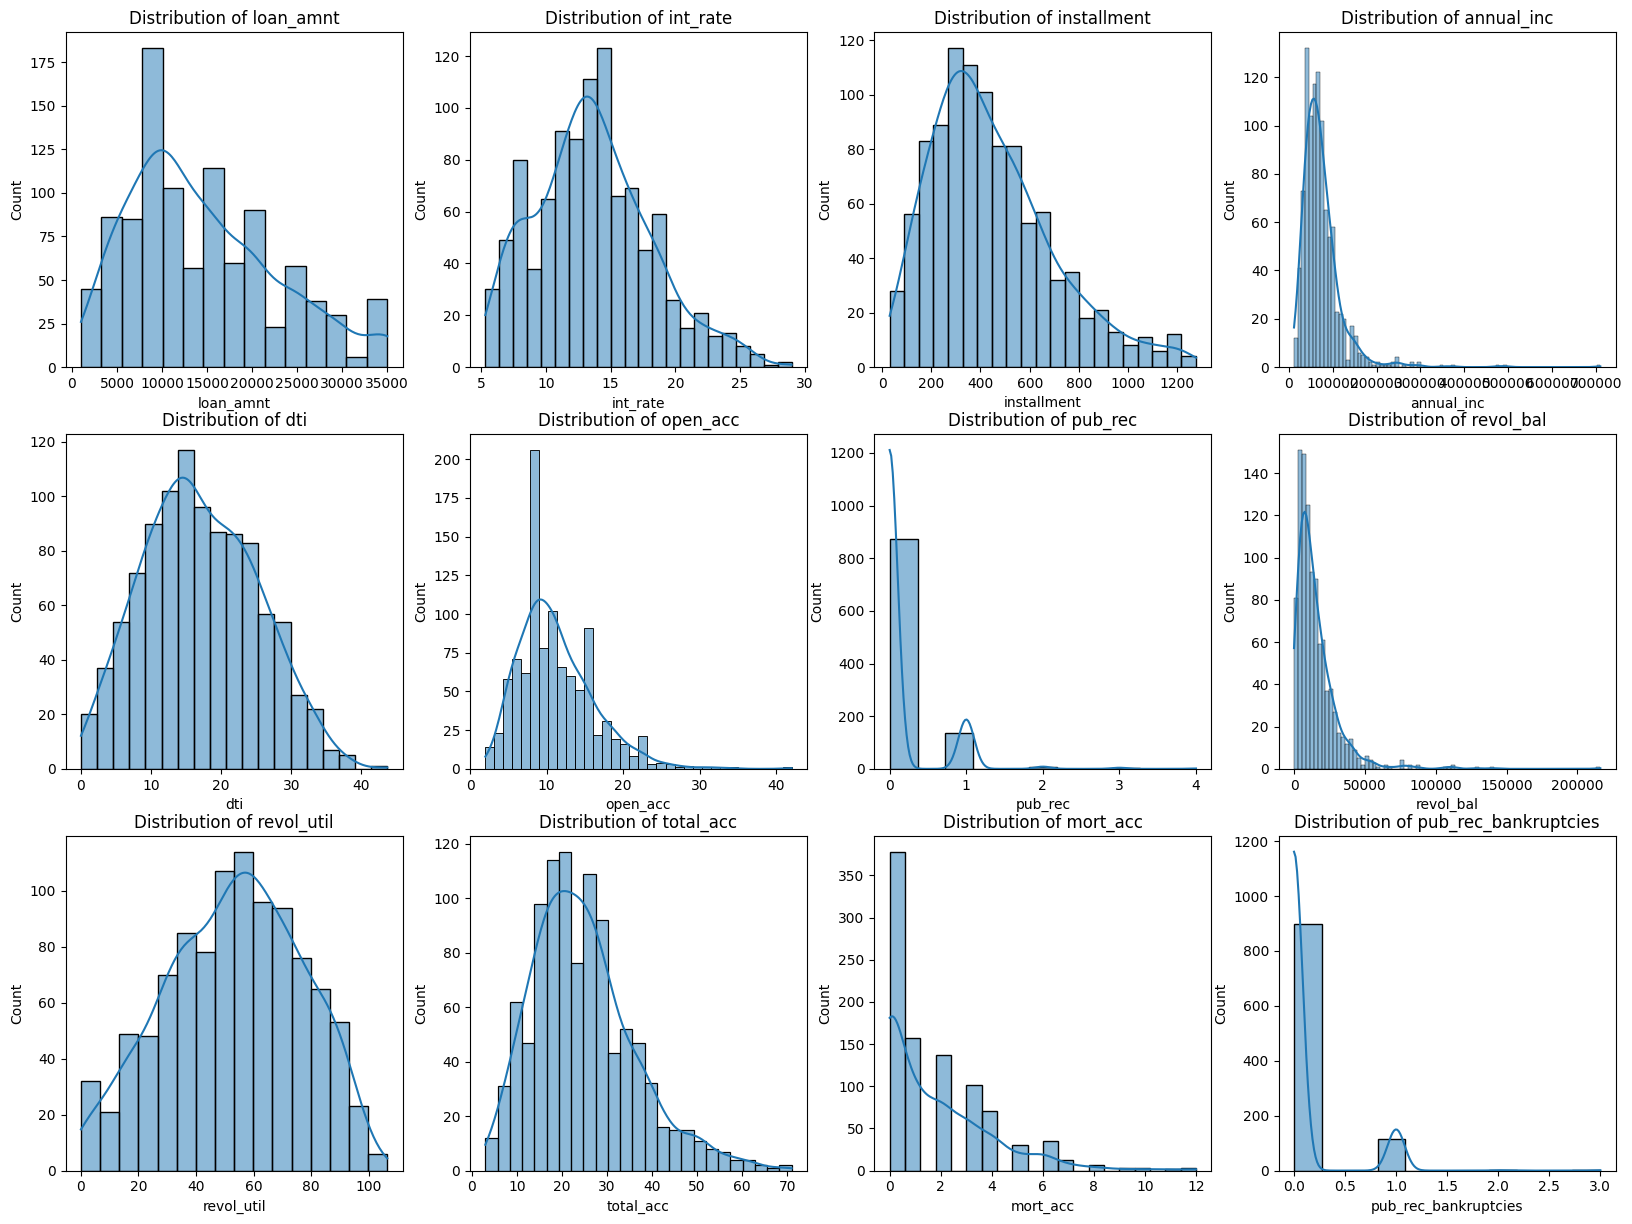

In [10]:
i=1
plt.figure(figsize=(20,20))
for col in numerical_data:
    plt.subplot(4,4,i)    
    sns.histplot(data[col], kde =True )
    plt.title(f'Distribution of {col}')
    i+=1

print(data[numerical_data].describe())
plt.show()

In [11]:
print(data[categorical_data].describe())

              term grade sub_grade emp_title emp_length home_ownership  \
count         1017  1017      1017       960        971           1017   
unique           2     7        35       837         11              3   
top      36 months     B        B4   Teacher  10+ years       MORTGAGE   
freq           787   321        93        17        349            481   

       verification_status issue_d loan_status             purpose  \
count                 1017    1017        1017                1017   
unique                   3      86           2                  13   
top               Verified  Oct-14  Fully Paid  debt_consolidation   
freq                   349      46         835                 598   

                     title earliest_cr_line initial_list_status  \
count                 1013             1017                1017   
unique                 277              311                   2   
top     Debt consolidation           Sep-03                   f   
freq      

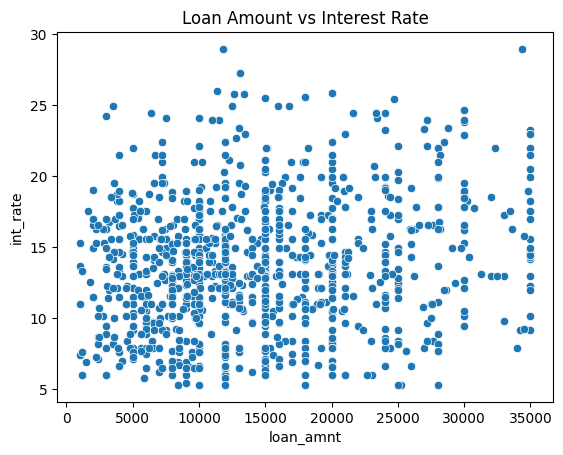

In [12]:
# Scatter plot between loan amount and interest rate
sns.scatterplot(x='loan_amnt', y='int_rate', data=data)
plt.title('Loan Amount vs Interest Rate')
plt.show()


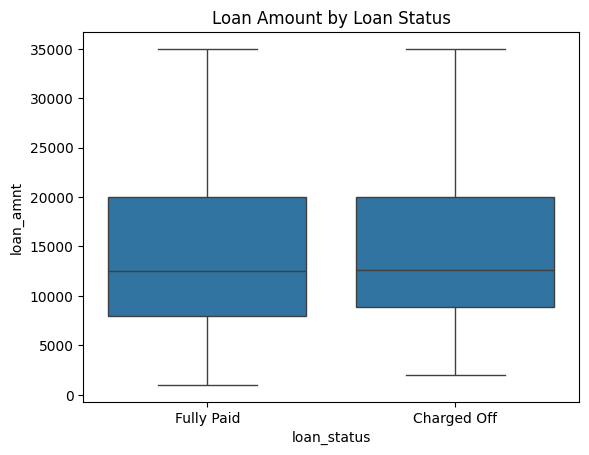

In [13]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount by Loan Status')
plt.show()


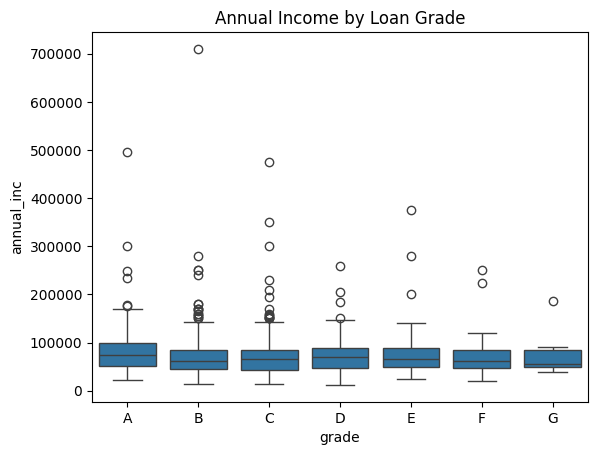

In [14]:
sns.boxplot(x='grade', y='annual_inc', data=data, order=sorted(data['grade'].unique()))
plt.title('Annual Income by Loan Grade')
plt.show()


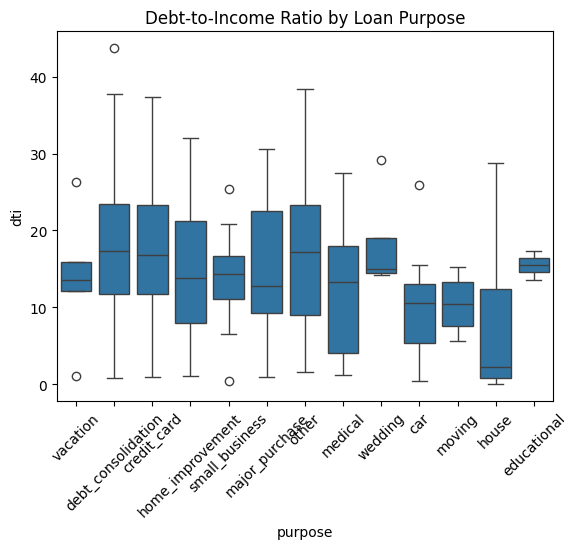

In [15]:
sns.boxplot(x='purpose', y='dti', data=data)
plt.title('Debt-to-Income Ratio by Loan Purpose')
plt.xticks(rotation=45)
plt.show()


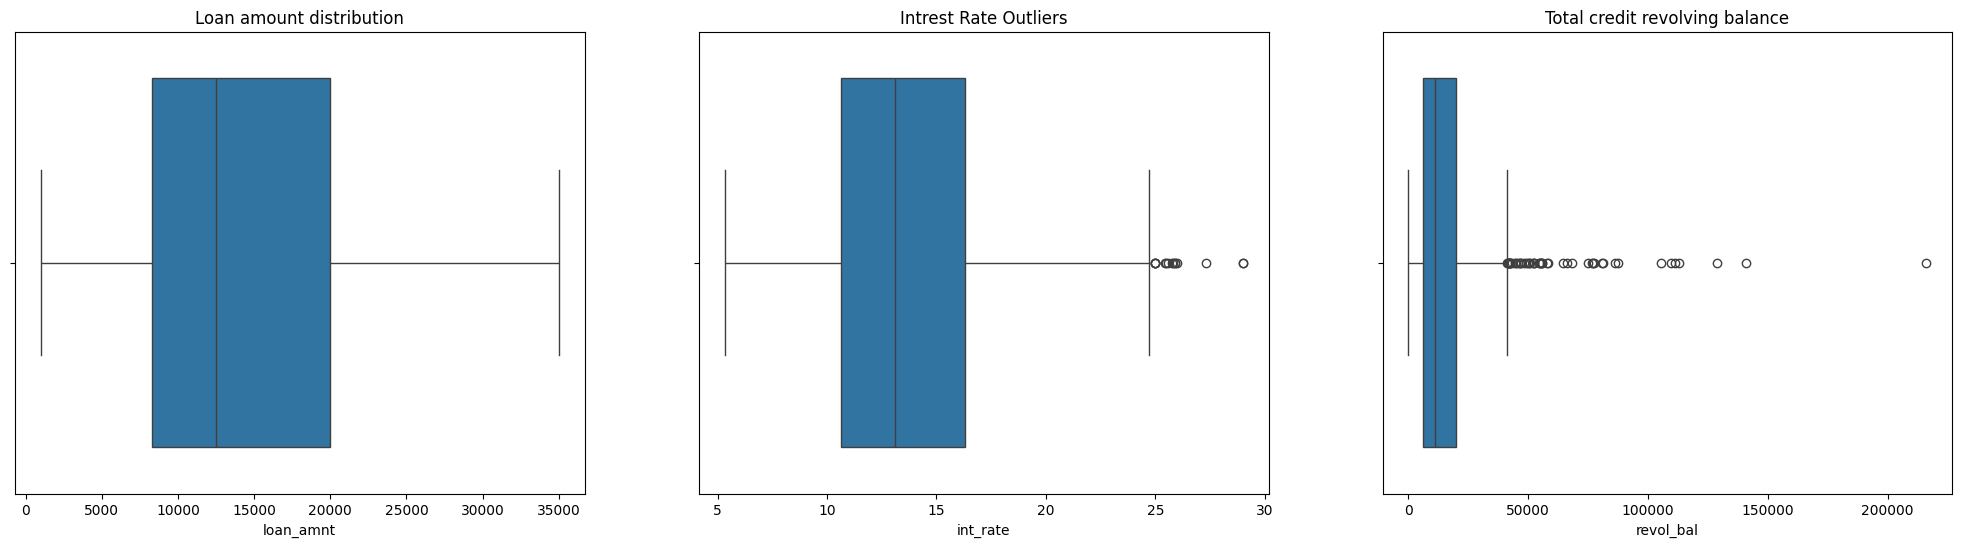

In [16]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt.title('Loan amount distribution')
sns.boxplot(x=data['loan_amnt'])
plt.subplot(1,3,2)
plt.title('Intrest Rate Outliers')
sns.boxplot(x=data['int_rate'])
plt.subplot(1,3,3)
plt.title('Total credit revolving balance')
sns.boxplot(x=data['revol_bal'])
plt.show()

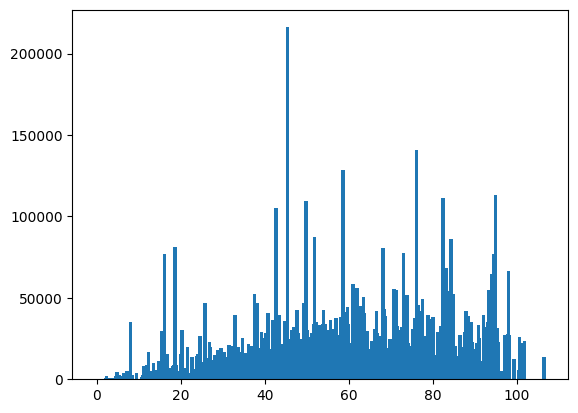

In [17]:
plt.bar(x=data['revol_util'], height=data['revol_bal'])
plt.show()

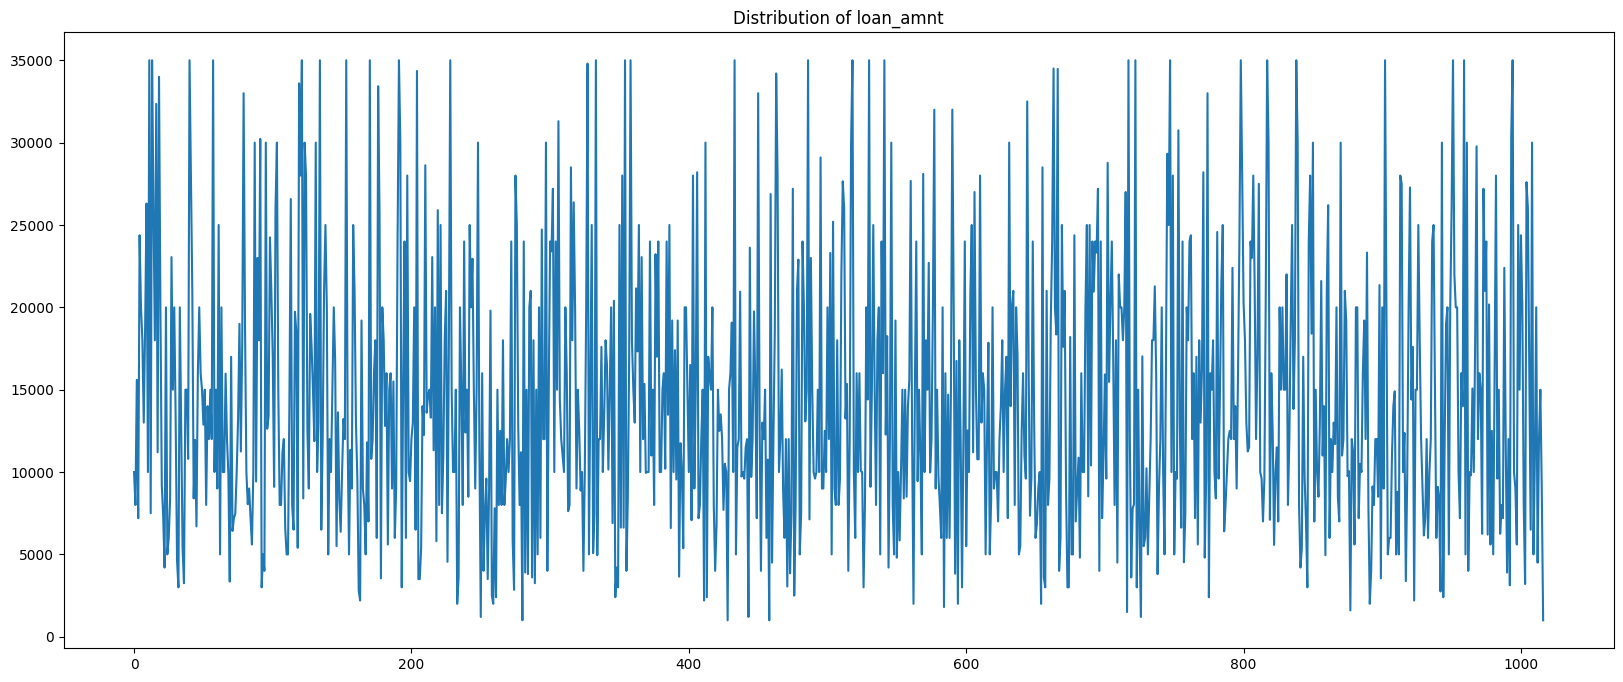

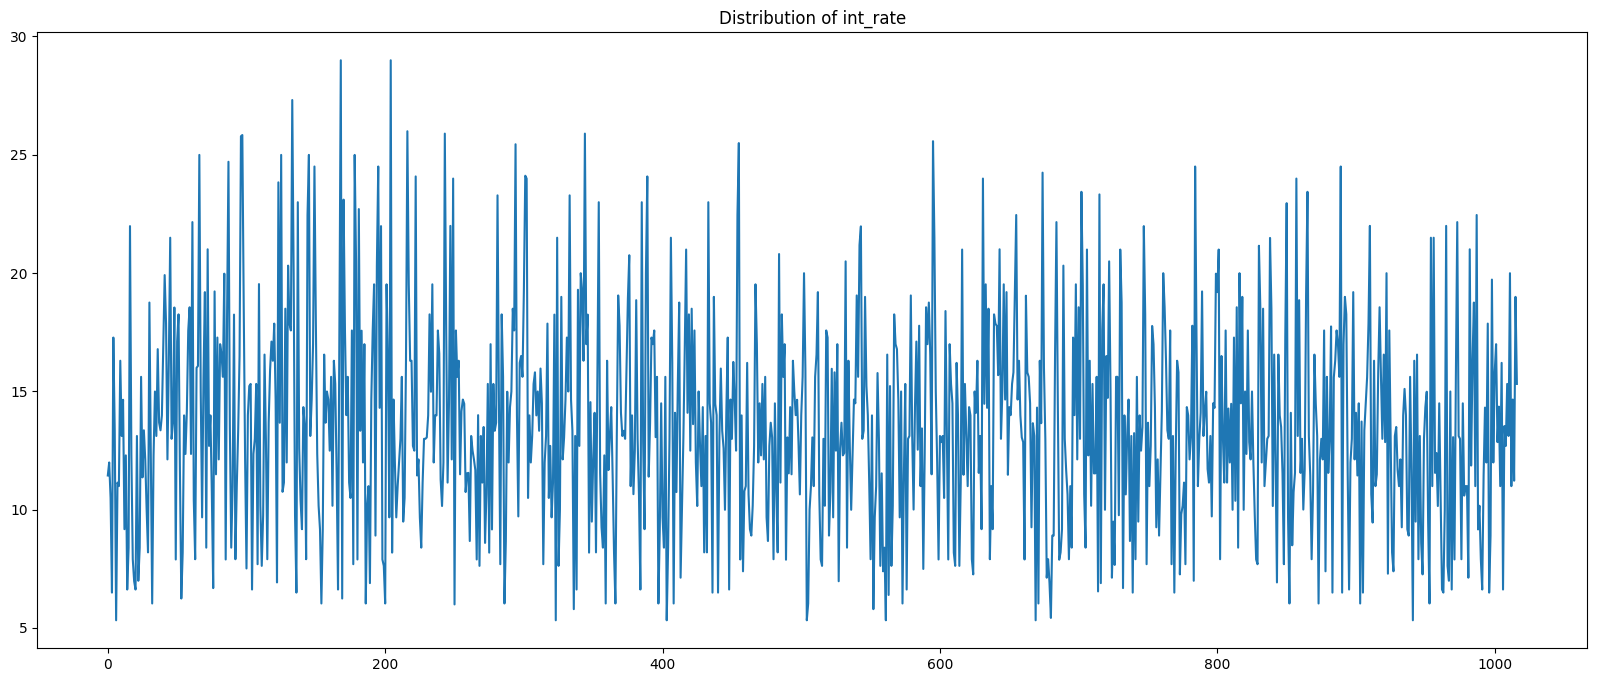

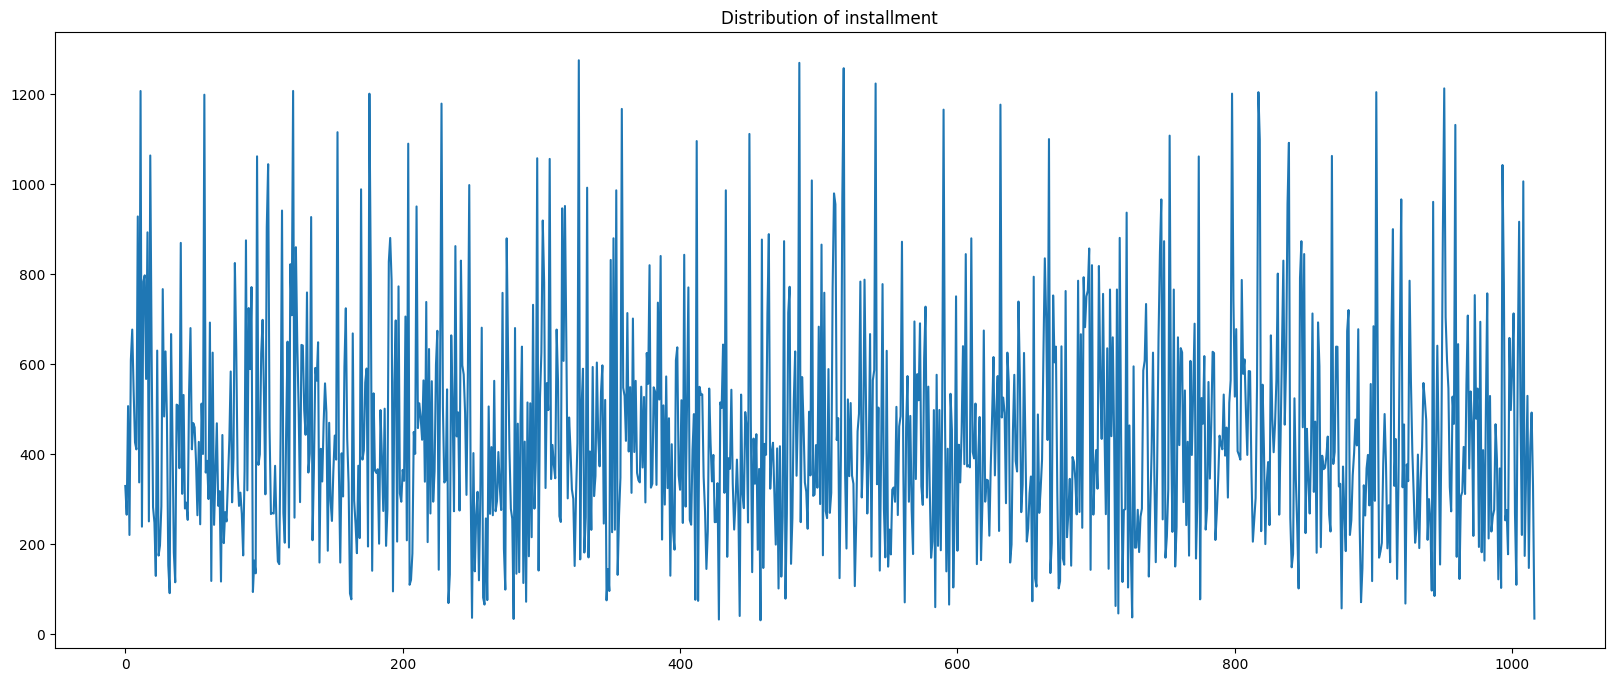

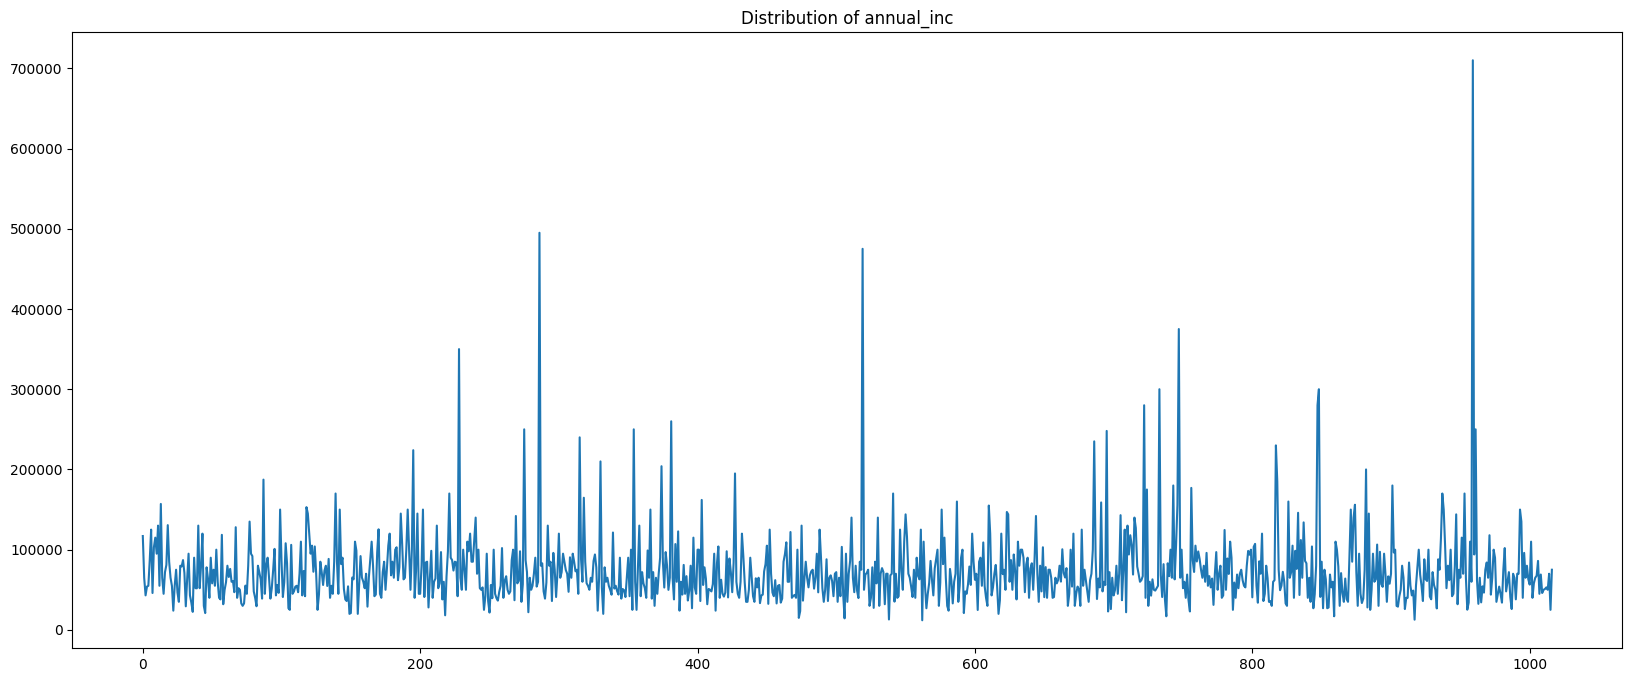

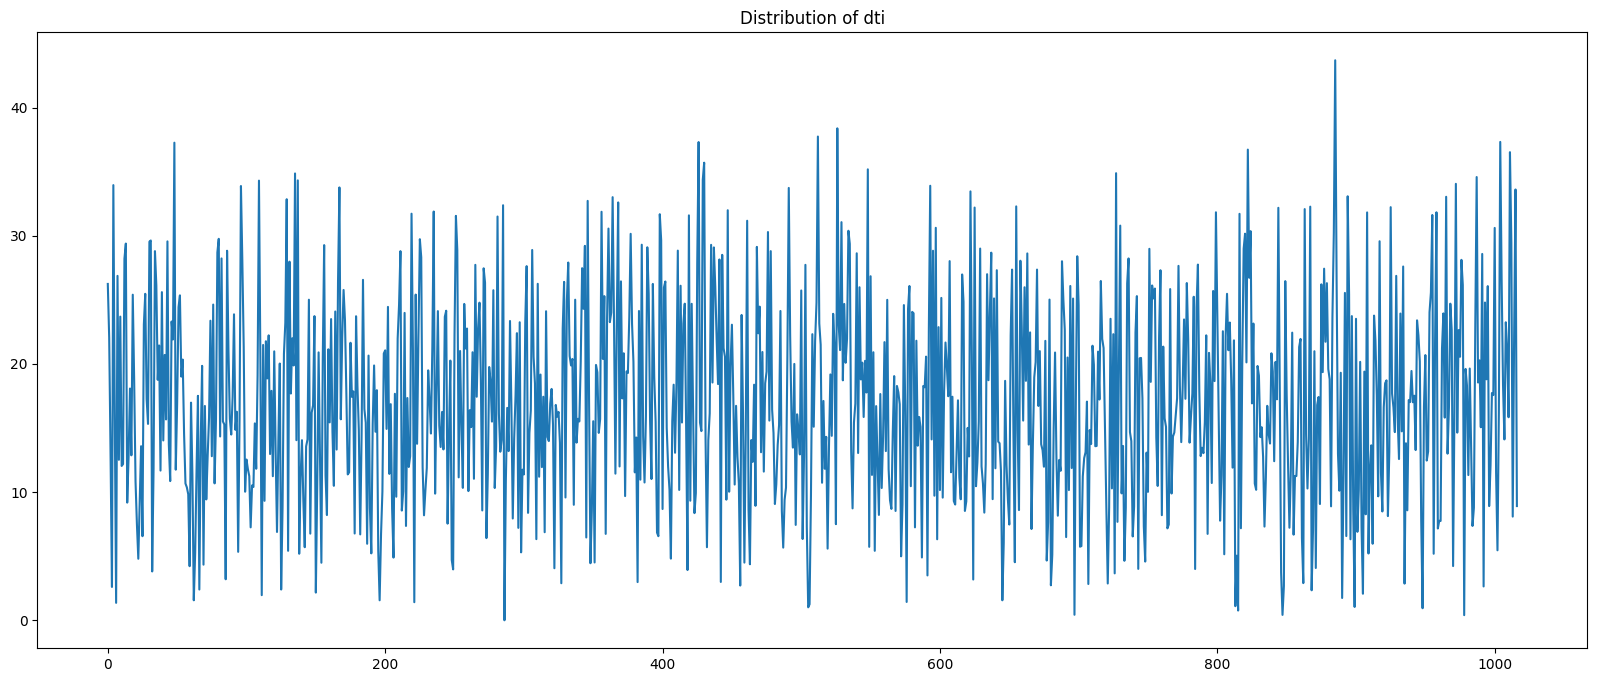

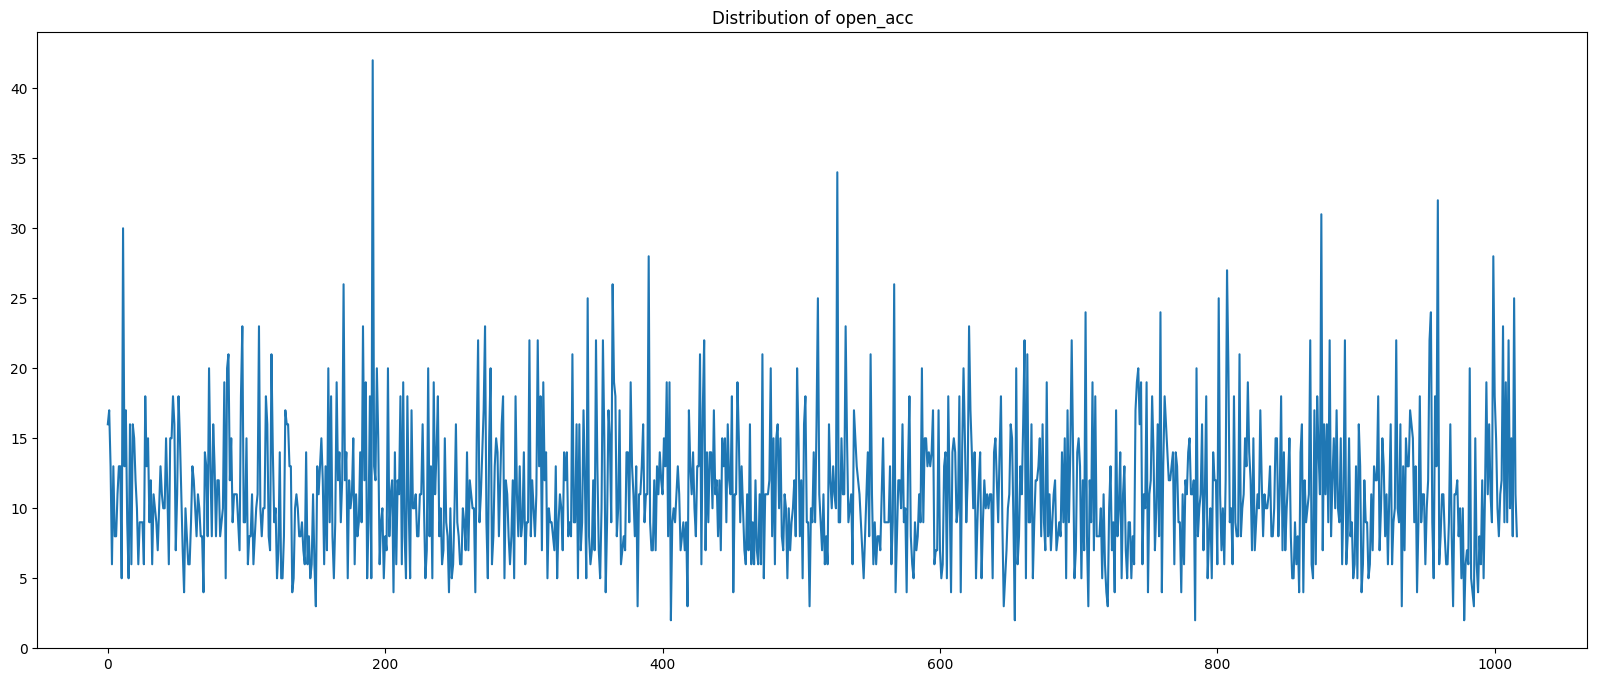

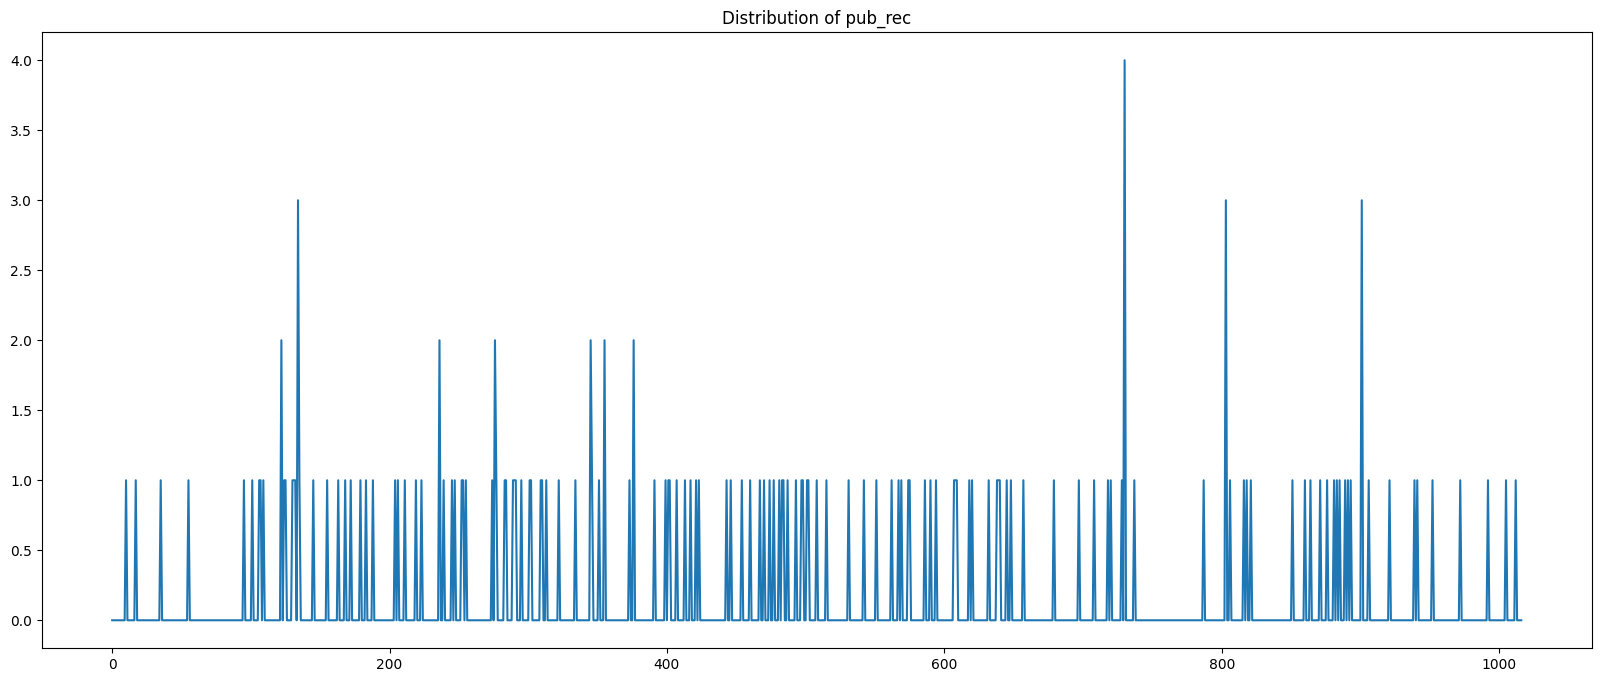

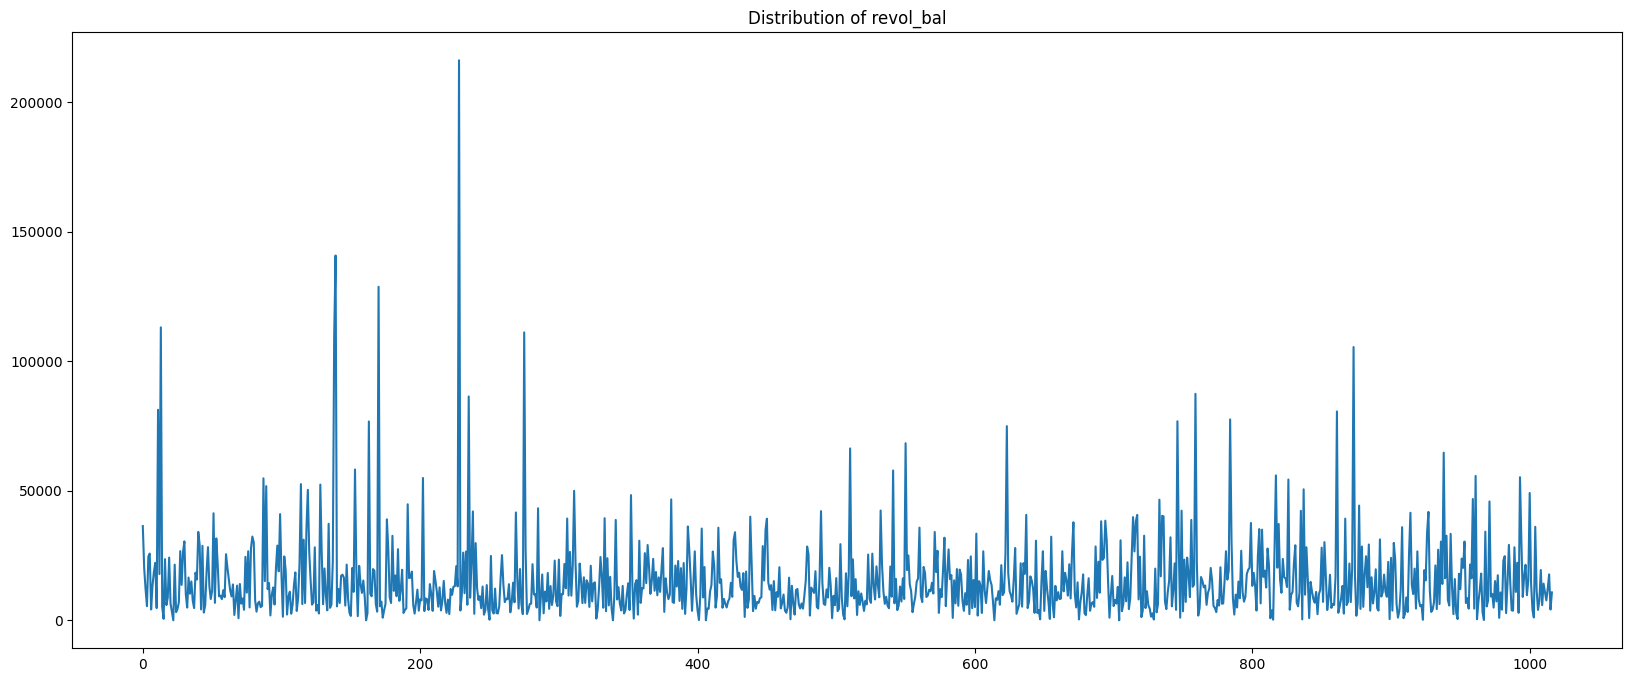

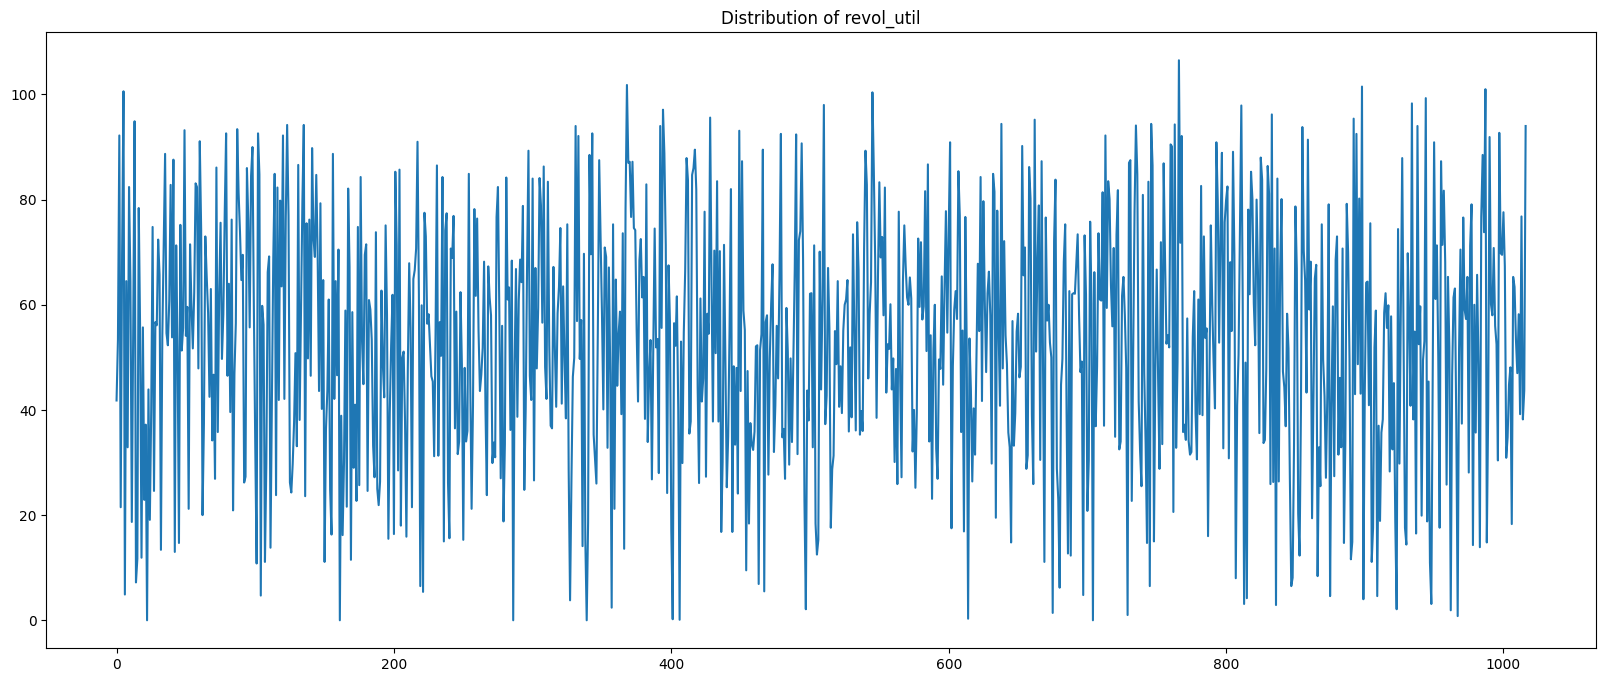

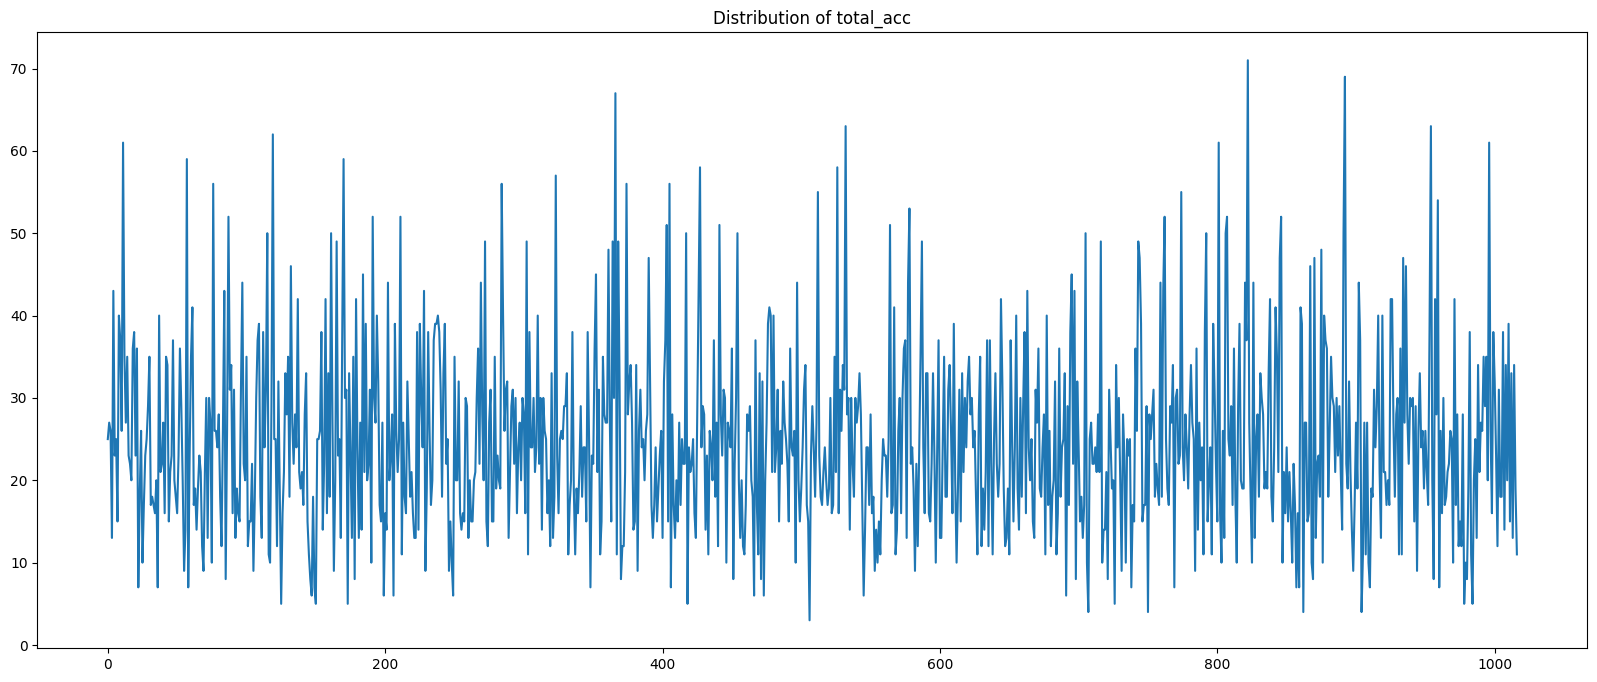

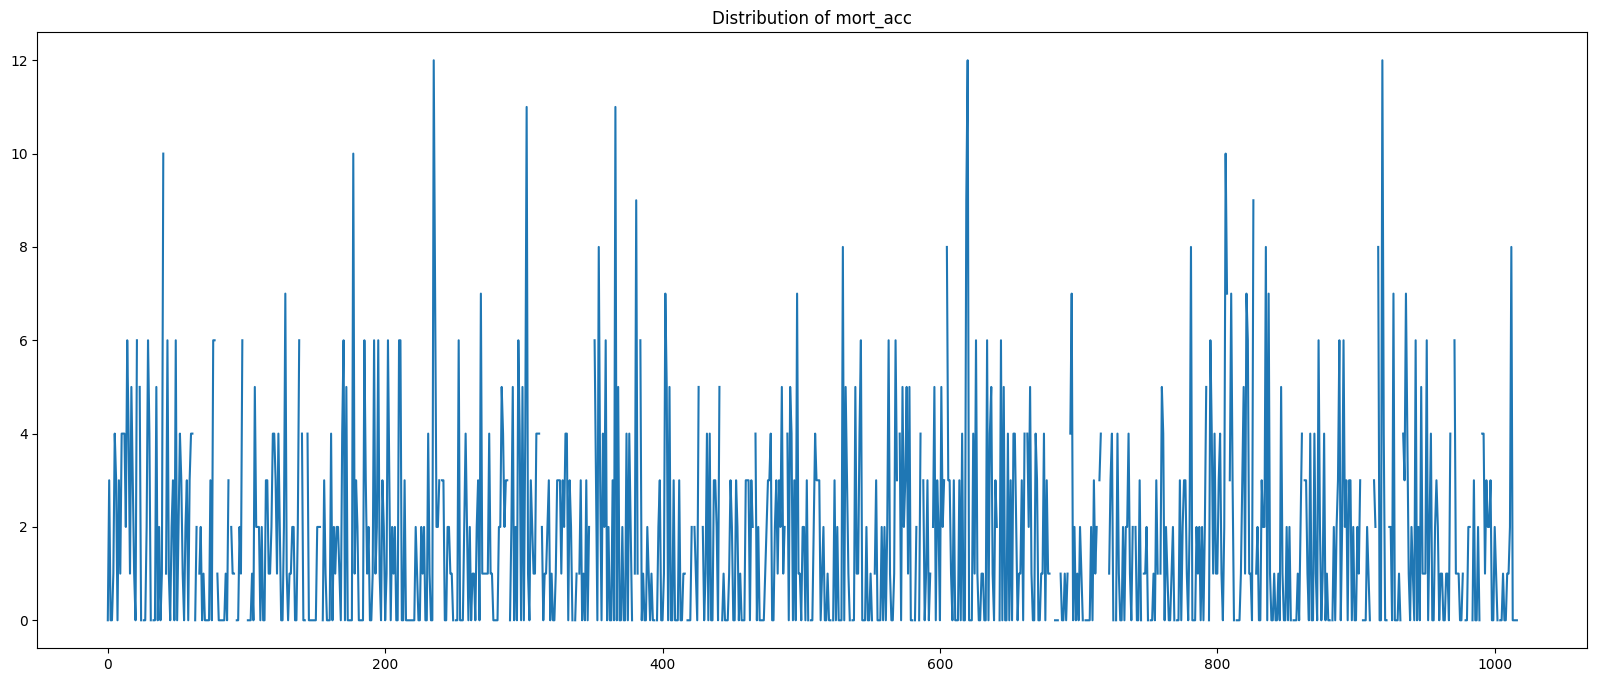

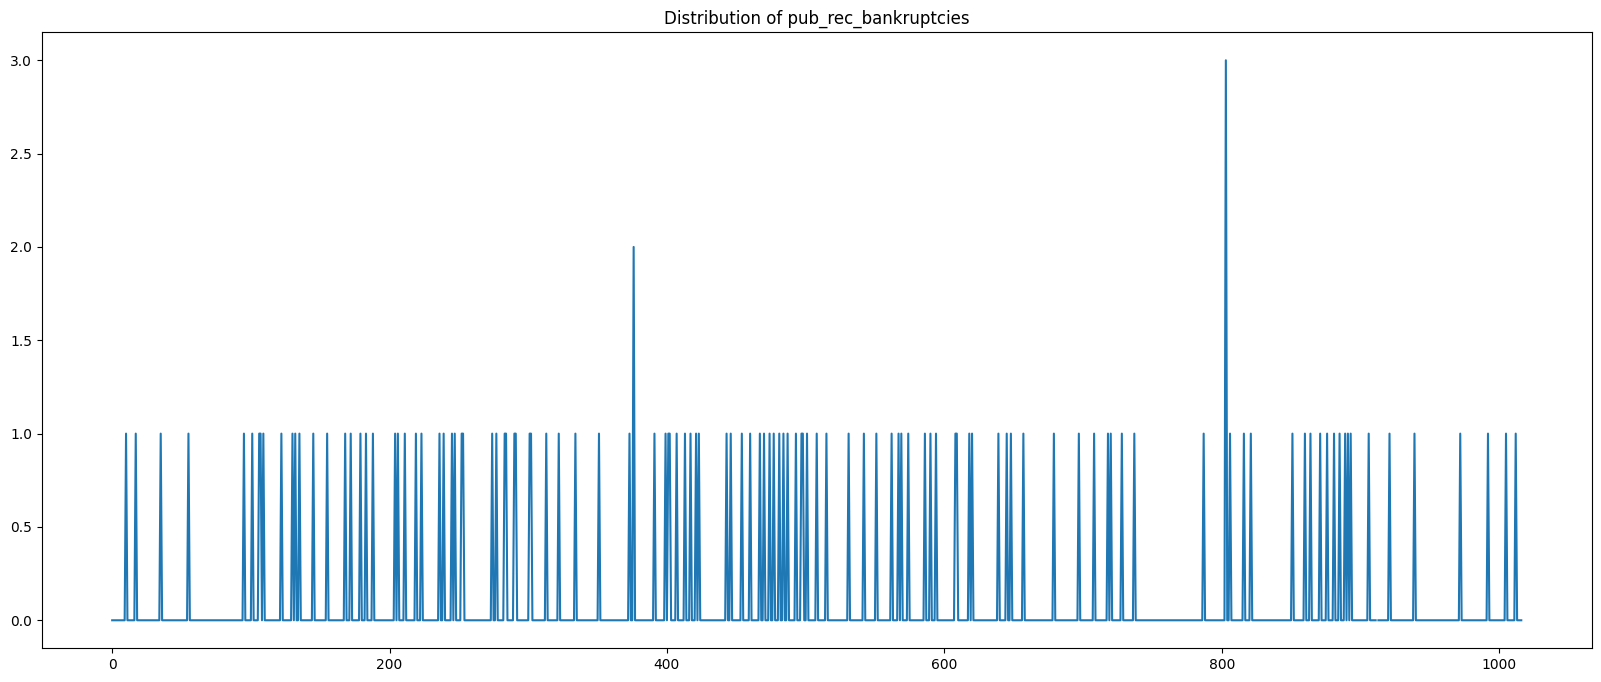

          loan_amnt     int_rate  installment     annual_inc          dti  \
count   1017.000000  1017.000000  1017.000000    1017.000000  1017.000000   
mean   14506.120944    13.626981   445.157601   74334.337217    17.057345   
std     8227.538845     4.481765   247.675409   48992.210241     8.080939   
min     1000.000000     5.320000    31.060000   12000.000000     0.000000   
25%     8325.000000    10.640000   267.470000   45000.000000    11.150000   
50%    12500.000000    13.110000   401.000000   65000.000000    16.590000   
75%    20000.000000    16.290000   578.690000   88000.000000    23.060000   
max    35000.000000    28.990000  1275.460000  710000.000000    43.690000   

          open_acc      pub_rec      revol_bal   revol_util    total_acc  \
count  1017.000000  1017.000000    1017.000000  1017.000000  1017.000000   
mean     11.190757     0.157325   15537.740413    53.111013    24.732547   
std       4.927725     0.417185   16321.744475    23.501289    11.380380   
mi

In [28]:


for col in numerical_data:  
    plt.figure(figsize=(20,8))
    data[col].plot()
    plt.title(f'Distribution of {col}')
    plt.show()


print(data[numerical_data].describe())